In [143]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [144]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [145]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [155]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax')) #Ten neurouns, 1 neuron from each digit
# softmax give the digit for the right answer

In [156]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [157]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8598 - loss: 0.4701
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9673 - loss: 0.1042
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9776 - loss: 0.0695
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9836 - loss: 0.0514
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9867 - loss: 0.0406


In [158]:
model.save('handwritten.keras')

In [159]:
model = tf.keras.models.load_model('handwritten.keras')

In [160]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.1014


In [161]:
print(loss)
print(accuracy)

0.0888252928853035
0.9739000201225281


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
This digit is probably a 6


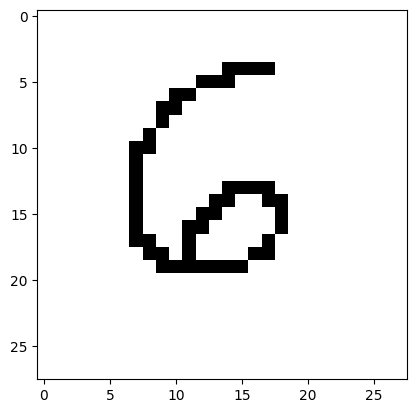

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This digit is probably a 3


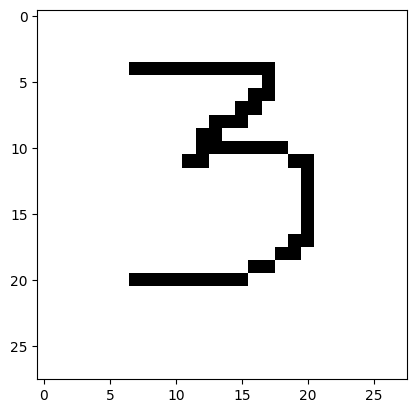

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This digit is probably a 8


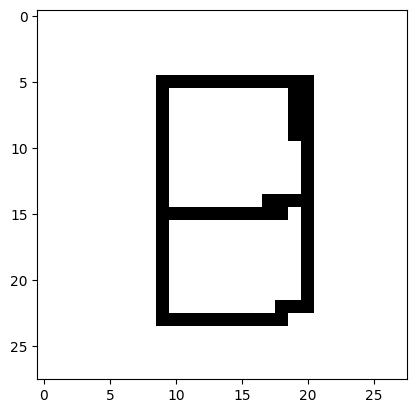

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This digit is probably a 4


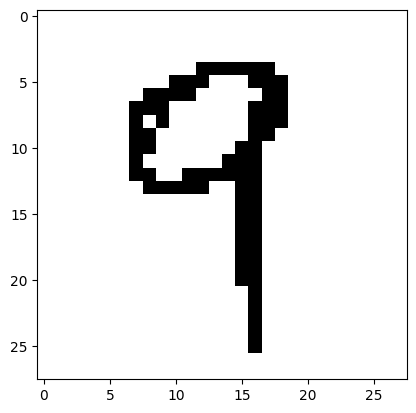

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
This digit is probably a 3


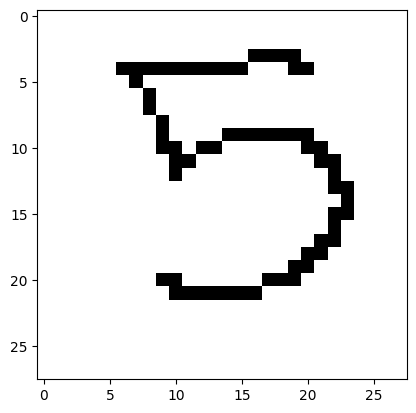

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This digit is probably a 2


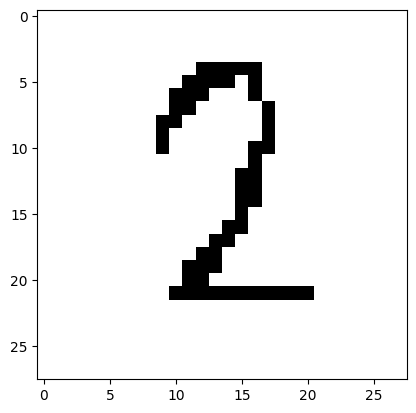

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This digit is probably a 1


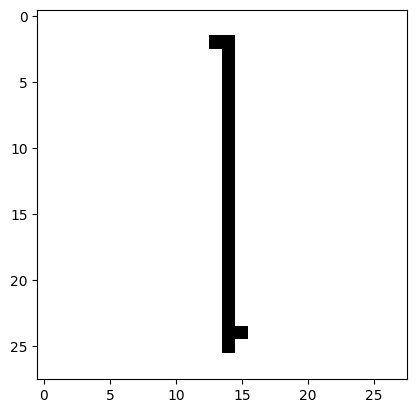

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This digit is probably a 0


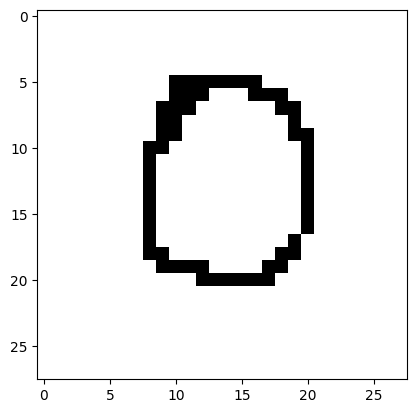

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This digit is probably a 4


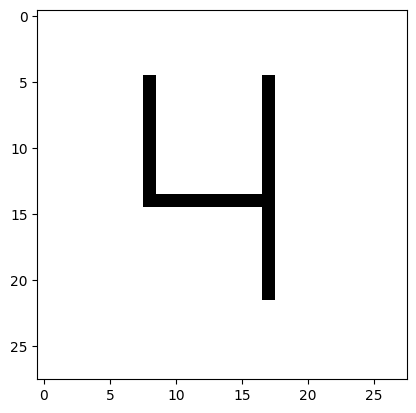

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This digit is probably a 7


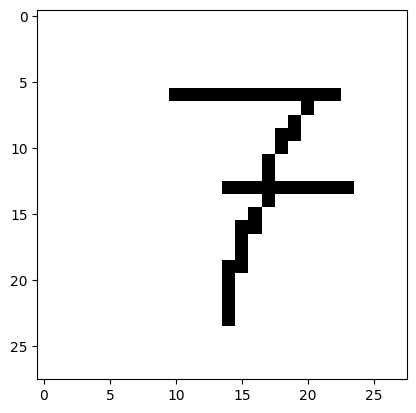

In [162]:
image_number = 1 
while os.path.isfile(f"ejemplos/digito{image_number}.png"):
    try: 
        img = cv2.imread(f"ejemplos/digito{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print('Error!')
    finally:
        image_number += 1 